# Lab 4 Data Visualisation on Python with Seaborn

## Import data

In [11]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
con = sqlite3.connect('northwind.db')
df=pd.read_sql('''with revenues as (SELECT
shipregion,
customerid,
orders.orderid,
orderdate,
productid,
(unitprice*quantity*(1-discount)) as revenue
from orders,"order details"
on orders.orderid="order details".orderid
group by orderdate,shipregion,customerid,orders.orderid, productid)
SELECT orderdate,shipregion, customerid,sum(revenue) as revenuedaily,
count(orderid) as ordersdaily
from revenues
group by orderdate;''',con=con)

df.orderdate=pd.to_datetime(df.orderdate)
df.shipregion=df.shipregion.astype('category')

## 2. Use matplotlib and seaborn to construct a dashboard from the data obtained, describing the orders:
2.1 Create line graphs describing the revenue history (revenuedaily) and the number of of orders (ordersdaily) (total for the week)
2.2 Create a pie chart showing shipregion's share in
revenue for the whole period
2.3 Create a bar chart showing the revenue of class A clients. According to ABC analysis this is the list of clients that bring 80% of the total revenue for the period.
2.4 Create a grid of 4 nested graphs and feed each of them with diagrams from 2.1 - 2.3
3. Change the line type on graphs 2.1 to a dashed line.
4. Add a colour fill below the sales chart and change the colours (revenue in blue and sales in red).
5. Add background fill for graph 2.1 describing revenue history
6. Add a header for the whole grid, and for each graph individually
7. In the pie chart, highlight the wedge that describes the region with the highest
the biggest share (move it out against other wedges)
8. Replace the base palette in the bar chart with a self-mixed palette of
green and yellow
9. Change the size of the entire chart grid by half (increase both in width and height).
height)
10. Add a grid with grey lines to graphs 2.1 and 2.3

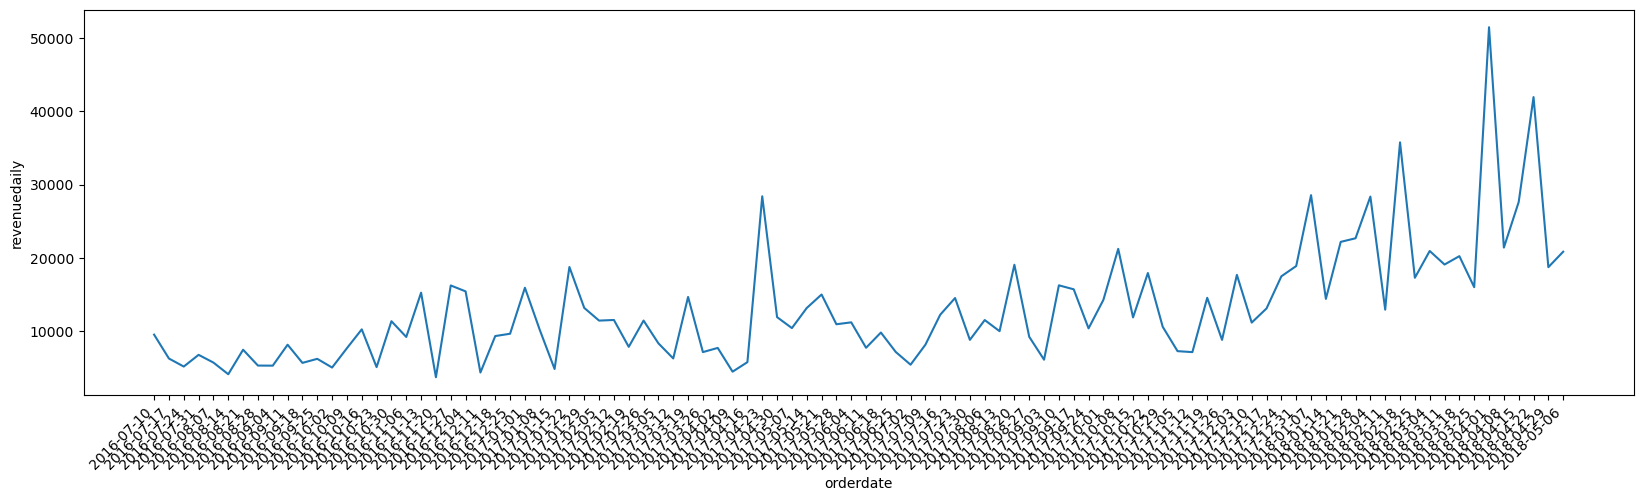

In [24]:
# Use matplotlib and seaborn to construct a dashboard from the data obtained, 
# describing the orders
# 2.1 Create line graphs describing the revenue history (revenuedaily) and the number of of orders (ordersdaily) (total for the week)
plt.figure(figsize=(20,5))
freq = 7
ax1 = sns.lineplot(x="orderdate", y="revenuedaily", data=df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index());
# ax1.set_xticks(df.groupby(pd.Grouper(key='orderdate', freq='W')).sum().reset_index().orderdate)
xticks = df.set_index('orderdate').resample('W').sum().index
ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45, ha='right');

In [9]:
df.set_index('orderdate')['revenuedaily'].resample('1W').sum()


orderdate
2016-07-10     9552.7600
2016-07-17     6299.7000
2016-07-24     5206.8750
2016-07-31     6802.5600
2016-08-07     5747.7200
                 ...    
2018-04-08    21417.6650
2018-04-15    27630.2800
2018-04-22    41925.6250
2018-04-29    18749.8750
2018-05-06    20858.9805
Freq: W-SUN, Name: revenuedaily, Length: 96, dtype: float64